### Linear Regression and Boston Data Set

- Load Boston Data Set from `sklearn.datasets`, use 

```
from sklearn.datasets import load_boston
boston = load_boston()
```
- Assign `data` to `X` and `target` to `y`


In [4]:
import pandas as pd

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

- Check the shape of the dataset

In [7]:
X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

X.shape, y.shape


((506, 13), (506,))

- Plot the scatter plot of each attribute versus `MEDV`
- You can use the starter code below

```
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
  ```

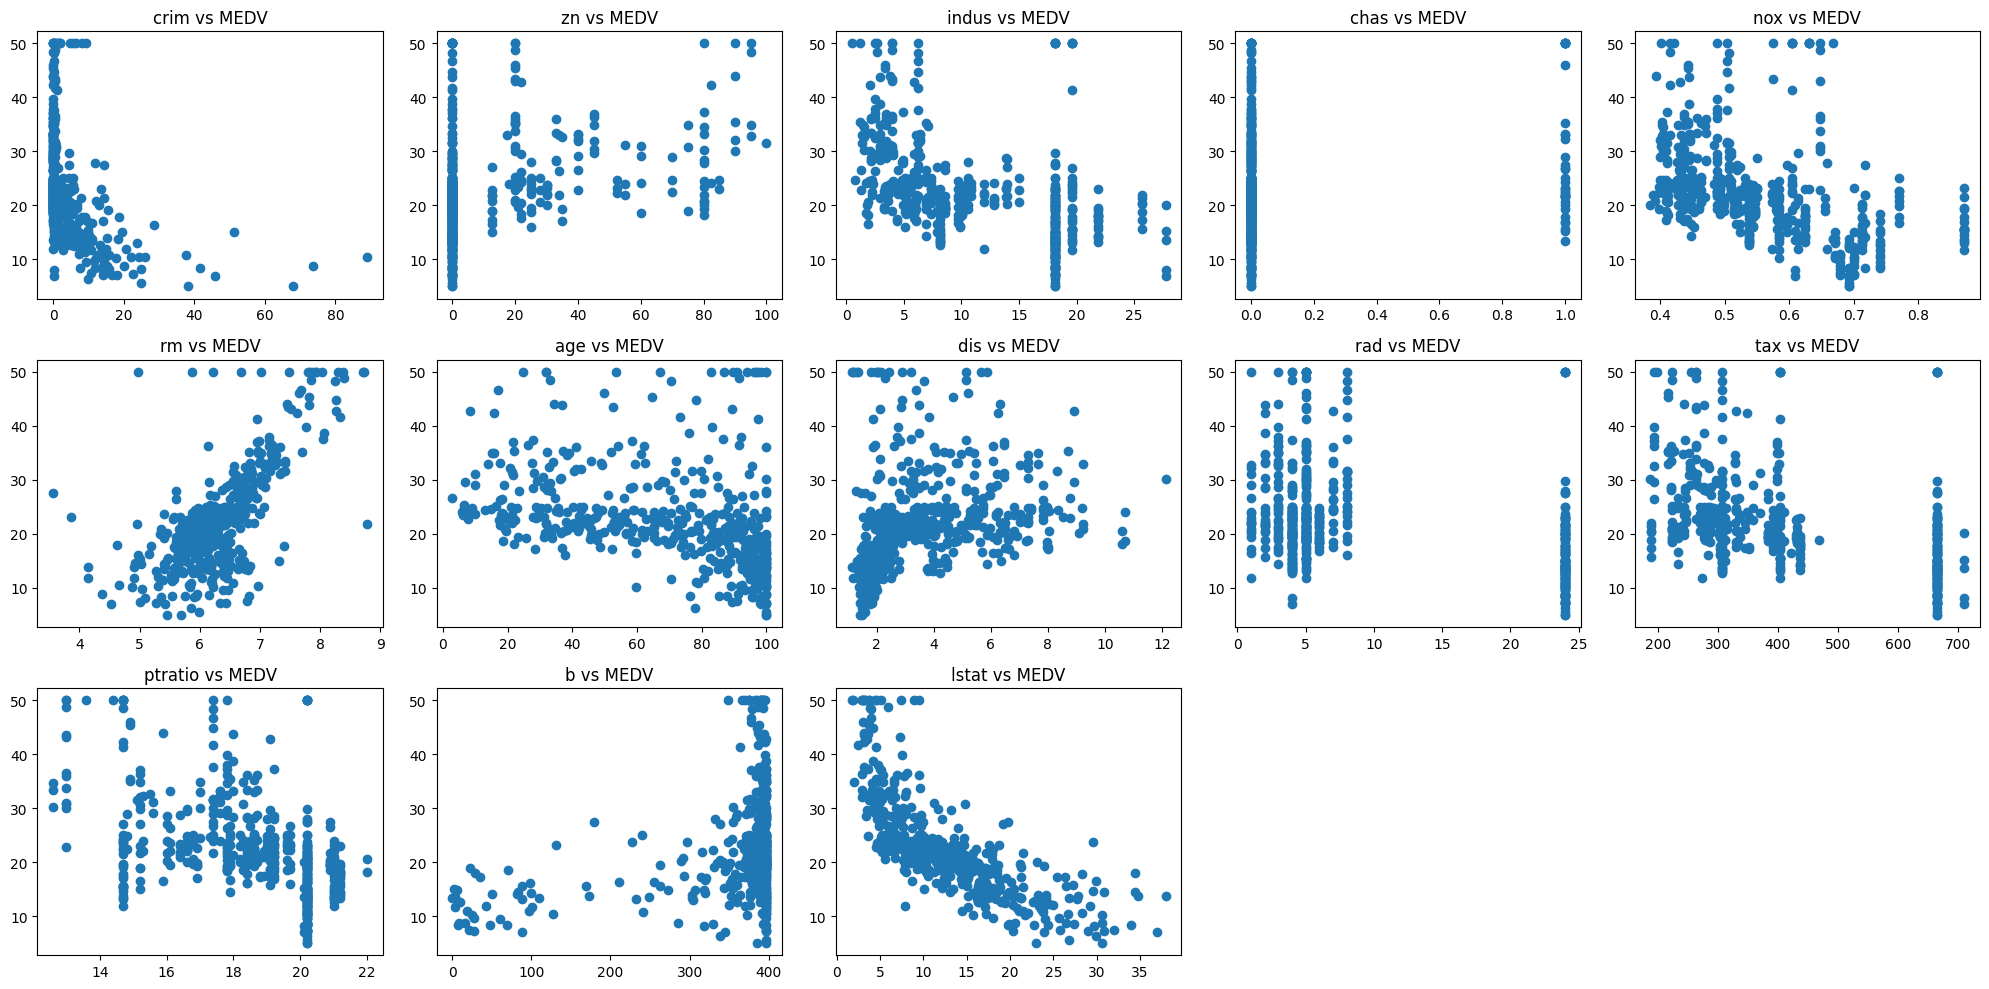

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.scatter(X.iloc[:, i], y)
    ax.set_title(f"{X.columns[i]} vs MEDV")
plt.tight_layout()
plt.show()


- Split the dataset into test and train datasets, you can set the random seed to 42 by `random_state=42`

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- run cross validation for the train and test datasets for `cv=10`
- print the mean score for the cross validation using linear regressor (`LinearRegressor()`)
- do the same two steps above for random forest regressor. For that you can import
```
from sklearn.ensemble import RandomForestRegressor
```

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()
cv_scores = cross_val_score(linear_reg, X_train, y_train.values.ravel(), cv=10)
cv_scores.mean()


0.6986644490108915

In [16]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=42)
cv_scores_rf = cross_val_score(random_forest_reg, X_train, y_train.values.ravel(), cv=10)
cv_scores_rf.mean()


0.8199705706552228

- Transform the Boston House dataset and split the dataset into test and train datasets
- Run cross validation
- Plot the coefficients of the model

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Cross-validation with polynomial features
cv_scores_poly = cross_val_score(linear_reg, X_train_poly, y_train_poly.values.ravel(), cv=10)
cv_scores_poly.mean()


0.7480583021445593